<a href="https://colab.research.google.com/github/Shanth1234/Chennai-price-prediction-project/blob/main/Chennai_price_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chennai House Price Prediction**

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Data**

The historical sale data is available here.

**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# **Libraries**

In [611]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [612]:
df = pd.read_csv('https://raw.githubusercontent.com/Shanth1234/Chennai-price-prediction-project/main/train-chennai-sale.csv')

In [613]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**DATA CLEANING**

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [615]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [616]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [617]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [618]:
df.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [619]:
df.shape

(7109, 22)

In [620]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [621]:
df.groupby('AREA')['AREA'].agg('count')

AREA
Adyar          773
Adyr             1
Ana Nagar        3
Ann Nagar        2
Anna Nagar     783
Chormpet         6
Chrmpet          6
Chrompet      1681
Chrompt          9
KK Nagar       996
KKNagar          1
Karapakam        3
Karapakkam    1363
T Nagar        496
TNagar           5
Velachery      979
Velchery         2
Name: AREA, dtype: int64

In [622]:
#df["N_BEDROOM"].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [623]:
#df["N_BATHROOM"].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [624]:
df=df.fillna({"N_BEDROOM":df["N_BEDROOM"].mode()[0],"N_BATHROOM":df["N_BATHROOM"].mode()[0],"QS_OVERALL":df["QS_OVERALL"].mean()})

In [625]:
df.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [626]:
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int64")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int64")


In [627]:
df["AGE"]=(df["DATE_SALE"]- df["DATE_BUILD"]).astype('timedelta64[Y]').astype('int')

In [628]:
df["SALES_PRICE"]=df["REG_FEE"]+df["COMMIS"]+df["SALES_PRICE"]

In [629]:
df['YEAR_BUILD'] = df['DATE_BUILD'].dt.year
df['YEAR_SALE'] = df['DATE_SALE'].dt.year

In [630]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [631]:
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar'})

In [632]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [633]:
park_facil={"Noo":"No"}
df.PARK_FACIL=df.PARK_FACIL.replace(park_facil)

In [634]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [635]:
sale_cond={"Adj Land":"AdjLand","Partiall":"Partial","PartiaLl":"Partial","Ab Normal":"AbNormal"}
df.SALE_COND=df.SALE_COND.replace(sale_cond)

In [636]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [637]:
utility={"All Pub":"AllPub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"}
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(utility)

In [638]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [639]:
BUILDTYPE={"Others":"Other","Commercial":"Comercial"}
df["BUILDTYPE"]=df["BUILDTYPE"].replace(BUILDTYPE)

In [640]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [641]:
STREET={"Paved":"Pavd","No Access":"NoAccess"}
df["STREET"]=df["STREET"].replace(STREET)

In [642]:
df["SALES_PRICE"]=df["REG_FEE"]+df["COMMIS"]+df["SALES_PRICE"]


In [643]:
df['YEAR_BUILD'] = df['DATE_BUILD'].dt.year
df['YEAR_SALE'] = df['DATE_SALE'].dt.year

In [644]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE,YEAR_BUILD,YEAR_SALE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,4.0,3.9,4.9,4.330,380000,144400,8648800,43,1967,2011
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,4.9,4.2,2.5,3.765,760122,304049,23846112,10,1995,2006
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,4.1,3.8,2.2,3.090,421094,92114,14185616,19,1992,2012
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,4.7,3.9,3.6,4.010,356321,77042,10497016,21,1988,2010
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,3.0,2.5,4.1,3.290,237000,74063,8028376,29,1979,2009


## **Exploratory Data Analysis**

In [645]:
plot1= px.histogram(df,x="AREA",color="AREA",title="AREA Wise Distribution")
plot1

In the Above plotting, we can see in AREA wise count Chrompet is highest with 1702 and Lowest is T Nagar with 501 counts 

Text(0.5, 1.0, 'SALES_PRICE')

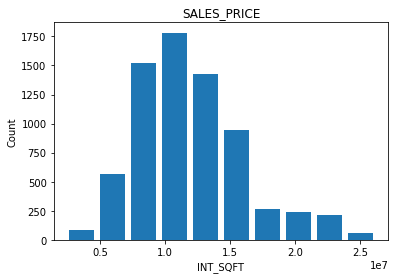

In [646]:
plt.hist(df.SALES_PRICE,rwidth=0.8)
plt.xlabel('INT_SQFT')
plt.ylabel('Count')
plt.title('SALES_PRICE')


In [647]:
plot2= px.histogram(df,x="N_BEDROOM",color="N_BEDROOM",title="No of BEDROOM")
plot2

We can see that most of the houses No Bedroom is one and very less houses have four Bedroom

Text(0.5, 1.0, 'DIST_MAINROAD')

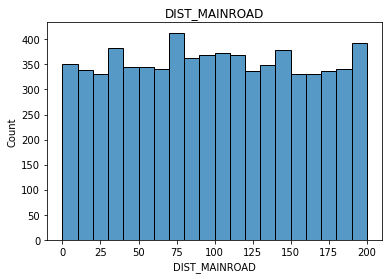

In [648]:
main_road=sns.histplot(x=df["DIST_MAINROAD"])
plt.title('DIST_MAINROAD')

Most of the houses are around 75 KM

Text(0.5, 1.0, 'N_BATHROOM')

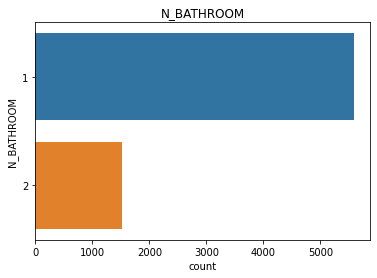

In [649]:
bathroom=sns.countplot(y=df.N_BATHROOM)
plt.title('N_BATHROOM')

Above 5000 houses have one bathroom

Text(0.5, 1.0, 'Sales Condition')

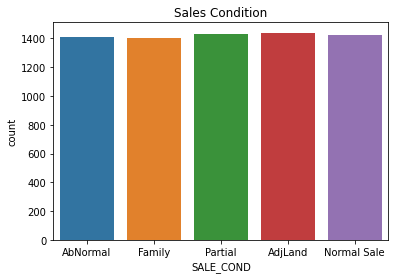

In [650]:
sns.countplot(data=df,x='SALE_COND')
plt.title('Sales Condition')

Around 1450 houses are in AdjLand Condition

Text(0.5, 1.0, 'N_ROOM')

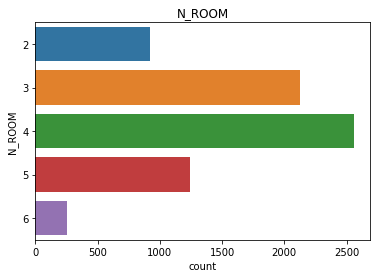

In [651]:
rooms=sns.countplot(y=df.N_ROOM)
plt.title('N_ROOM')


Around 2500 houses are having 4 rooms in total

Text(0.5, 1.0, 'Parking Facility')

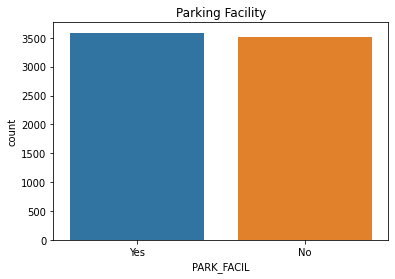

In [652]:
sns.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

3500 houses have parking facility


Text(0.5, 1.0, 'Type of Building')

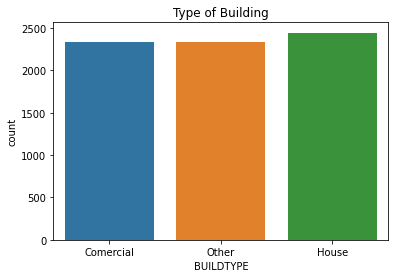

In [653]:
sns.countplot(data=df,x='BUILDTYPE')
plt.title('Type of Building')


Most of the Buildings are house

Text(0.5, 1.0, 'Utility Available')

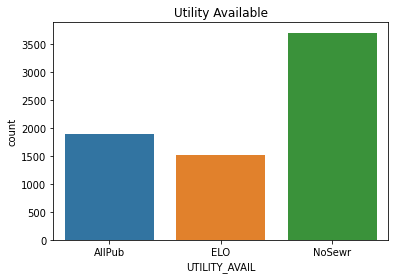

In [654]:
sns.countplot(data=df,x='UTILITY_AVAIL')
plt.title('Utility Available')

Most houses doesn't have NoSewr


Text(0.5, 1.0, 'Street Type')

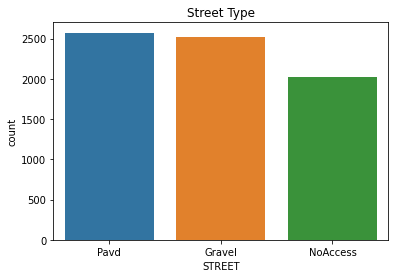

In [655]:
sns.countplot(data=df,x='STREET')
plt.title('Street Type')

Most houses are with Paved Street


Text(0.5, 1.0, 'Zones of Chennai')

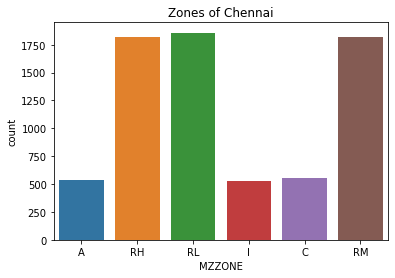

In [656]:
sns.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')


Around 1800 houses are in RL Zone

Text(0.5, 1.0, 'Area in Squarefeet')

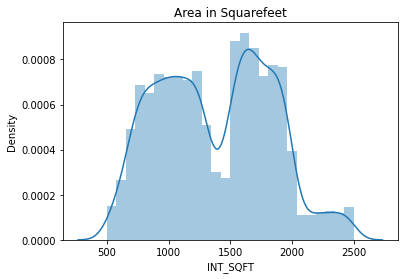

In [657]:
sns.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet')

Text(0.5, 1.0, 'Distance from Mainroad(in meters)')

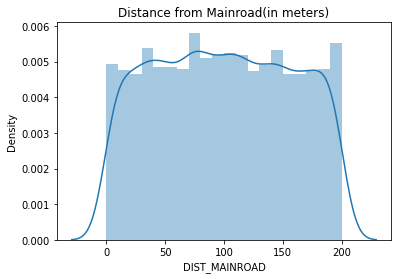

In [658]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

Text(0.5, 1.0, 'SALES_PRICE')

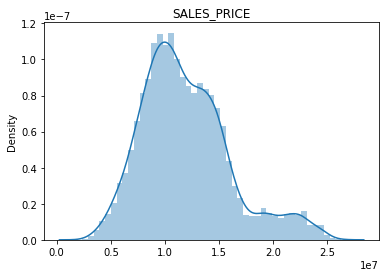

In [659]:
sale_price=sns.distplot(x=df.SALES_PRICE)
plt.title('SALES_PRICE')

# Distribution of Feature vs Target Column

In [660]:
x=pd.DataFrame(df.groupby("AREA")["SALES_PRICE"].mean())
y=df["AREA"].unique()
y=sorted(y)

data={"AREA":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)


fig=px.bar(temp,x="AREA",y="Avg_price",color="AREA",title="AREA vs Avg.SALES_PRICE")
fig

From the graph, we can predict that Karapakkam has least price when compared to other area and T nagar is high price.The graph shows linear relationship.

In [661]:
fig=px.scatter(x=df.INT_SQFT,y=df.SALES_PRICE,color=df.INT_SQFT)
fig

From the graph,we can predict the price for the SQFT . As the sqft increase price increases. The graph shows linear relationship

In [662]:
fig=px.scatter(x=df.DIST_MAINROAD,y=df.SALES_PRICE,color=df.DIST_MAINROAD)
fig


From the graph, we can predict that there is no linear relationship

In [663]:
x=pd.DataFrame(df.groupby("N_BATHROOM")["SALES_PRICE"].mean())
y=df["N_BATHROOM"].unique()
y=sorted(y)

data={"N_BATHROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.N_BATHROOM,y=temp.Avg_price,title="N_BATHROOM vs SALES_PRICE")
fig

There is relationship between sale price and No of bathroom

In [664]:
x=pd.DataFrame(df.groupby("N_ROOM")["SALES_PRICE"].mean())
y=df["N_ROOM"].unique()
y=sorted(y)

data={"N_ROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.N_ROOM,y=temp.Avg_price,title="N_ROOM vs SALES_PRICE")
fig

From the graph , we can predict that as the total no.of.rooms increases the price also increases. The graph shows linear relationship 

In [665]:
x=pd.DataFrame(df.groupby("SALE_COND")["SALES_PRICE"].mean())
y=df["SALE_COND"].unique()
y=sorted(y)

data={"SALE_COND":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.SALE_COND,y=temp.Avg_price,title="SALE_COND vs SALES_PRICE")
fig

From the graph, we can predict that houses in AdjLand Condition has high in price and the graph shows linear relationship so it is an essential feature

In [666]:
x=pd.DataFrame(df.groupby("PARK_FACIL")["SALES_PRICE"].mean())
y=df["PARK_FACIL"].unique()
y=sorted(y)

data={"PARK_FACIL":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.PARK_FACIL,y=temp.Avg_price,title="PARK_FACIL vs SALES_PRICE")
fig

From the graph, houses with parking facility are high in price. The graph shows linear relationship and it is an essential feature

In [667]:
x=pd.DataFrame(df.groupby("BUILDTYPE")["SALES_PRICE"].mean())
y=df["BUILDTYPE"].unique()
y=sorted(y)

data={"BUILDTYPE":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.BUILDTYPE,y=temp.Avg_price,title="BUILDTYPEvs Avg.SALES_PRICE")
fig

From the graph, it is clear that it's an essential feature

In [668]:
x=pd.DataFrame(df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean())
y=df["UTILITY_AVAIL"].unique()
y=sorted(y)

data={"UTILITY_AVAIL":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.UTILITY_AVAIL,y=temp.Avg_price,title="UTILITY_AVAIL vs Avg.SALES_PRICE")
fig

From the graph, it is clear that it's an essential feature

In [669]:
x=pd.DataFrame(df.groupby("STREET")["SALES_PRICE"].mean())
y=df["STREET"].unique()
y=sorted(y)

data={"STREET":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.STREET,y=temp.Avg_price,title="STREET vs Avg.SALES_PRICE")
fig

Here , houses with gravel Street costs high in price. It has linear relationship and it is an essential feature

In [670]:
x=pd.DataFrame(df.groupby("MZZONE")["SALES_PRICE"].mean())
y=df["MZZONE"].unique()
y=sorted(y)

data={"MZZONE":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.MZZONE,y=temp.Avg_price , title="MZZONE vs Avg.SALES_PRICE")
fig

Here Property in RM zone costs high in price. It has linear relationship and it is an essential feature

In [671]:
x=pd.DataFrame(df.groupby("QS_ROOMS")["SALES_PRICE"].mean())
y=df["QS_ROOMS"].unique()
y=sorted(y)

data={"QS_ROOMS":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_ROOMS,y=temp.Avg_price,title="QS_ROOMS vs Avg.SALES_PRICE")
fig

Here, QS_BathRoom are Masked data so,we can't take it as an essential feature

In [672]:
x=pd.DataFrame(df.groupby("QS_BEDROOM")["SALES_PRICE"].mean())
y=df["QS_BEDROOM"].unique()
y=sorted(y)

data={"QS_BEDROOM":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_BEDROOM,y=temp.Avg_price,title="QS_BEDROOM vs Avg.SALES_PRICE")
fig

In [673]:
x=pd.DataFrame(df.groupby("QS_OVERALL")["SALES_PRICE"].mean())
y=df["QS_OVERALL"].unique()
y=sorted(y)

data={"QS_OVERALL":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.QS_OVERALL,y=temp.Avg_price,title="QS_OVERALL vs Avg.SALES_PRICE")
fig

Here, QS_Overall are Masked data so,we can't take it as an essential feature

In [674]:
x=pd.DataFrame(df.groupby("AGE")["SALES_PRICE"].mean())
y=df["AGE"].unique()
y=sorted(y)

data={"AGE":y,"Avg_price":x["SALES_PRICE"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

fig=px.bar(x=temp.AGE,y=temp.Avg_price,title="AGE vs Avg.SALES_PRICE")
fig

## Label Encoding

In [675]:
df["AREA"]=df["AREA"].replace({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})







In [676]:
df["SALE_COND"]=df["SALE_COND"].replace({"Partial":1,"Family":2,"AbNormal":3,"Normal Sale":4,"AdjLand":5})

In [677]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"No":0,"Yes":1})

In [678]:
df["BUILDTYPE"]=df["BUILDTYPE"].replace({"House":1,"Other":2,"Comercial":3})

In [679]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace({"ELO":1,"NoSewr":2,"AllPub":3})

In [680]:
df["STREET"]=df["STREET"].replace({"NoAccess":1,"Pavd":2,"Gravel":3})

In [681]:
df["MZZONE"]=df["MZZONE"].replace({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})

In [682]:
df.to_csv("Cleaned.csv")

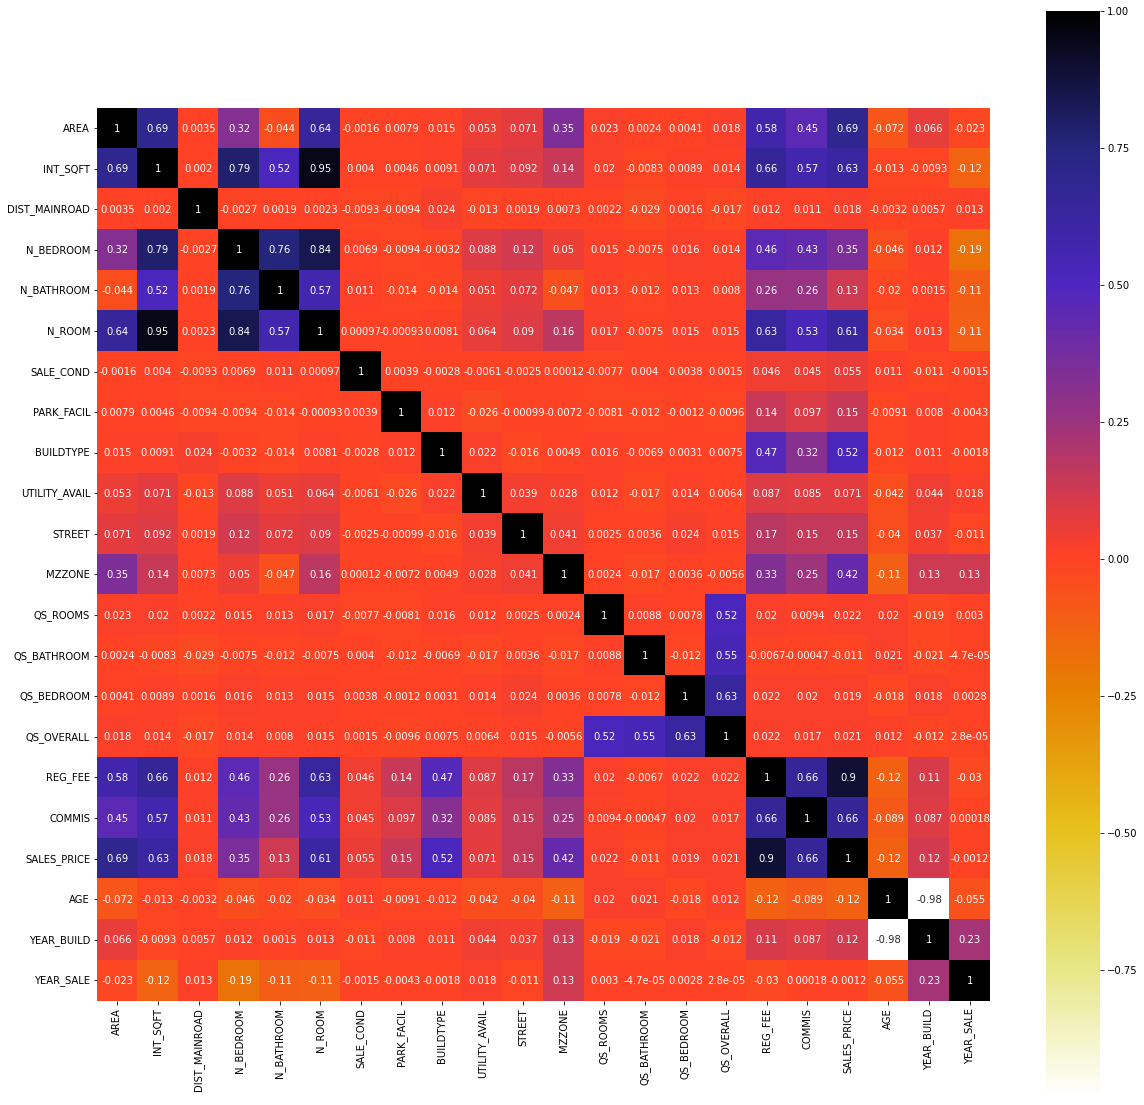

In [683]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True,square=True,cmap=plt.cm.CMRmap_r)
plt.show()


In [684]:
df.drop(["PRT_ID","DIST_MAINROAD","DATE_SALE","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS"],axis=1,inplace=True)

# Splitting Training and Testing Data

In [685]:
df.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,YEAR_BUILD,YEAR_SALE
0,1,1004,1,1,3,3,1,3,3,2,1,8648800,43,1967,2011
1,6,1986,2,1,5,3,0,3,3,3,4,23846112,10,1995,2006


In [686]:
x=df[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","AGE"]]
y=df["SALES_PRICE"]

In [687]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)


# Machine Learning

Linear Regression

In [688]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Linear Regression Score:",model.score(x_test,y_test)*100)

Linear Regression Score: 88.05584279659145


Decision Tree

In [689]:
from sklearn.tree import DecisionTreeRegressor
d_t = DecisionTreeRegressor()
d_t.fit(x_train,y_train)

y_pred = d_t.predict(x_test)
print("Decision Tree Score:",d_t.score(x_test,y_test)*100)

Decision Tree Score: 97.18558322430881


Random Forest

In [690]:
from sklearn.ensemble import RandomForestRegressor
#Fitting the model
r_f = RandomForestRegressor(max_depth=16,n_estimators=180,random_state=15)
r_f.fit(x_train,y_train)

ypred = r_f.predict(x_test)
r_f_score = r_f.score(x_test,y_test)*100
print("Random Forest Square is :",r_f_score)

Random Forest Square is : 98.88442978911975


Gradient Boosting

In [691]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
gradientboosting = GradientBoostingRegressor()
gradientboosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = gradientboosting.score(x_test,y_test)*100
print("Gradient Boosting Score:",GradientBoosting_score)

Gradient Boosting Score: 99.07203211858096


AdaBoost

In [692]:
from sklearn.ensemble import AdaBoostRegressor
#fitting the model
adaboost = AdaBoostRegressor(random_state=15,n_estimators=130)
adaboost.fit(x_train,y_train)

#predicting the model
adaboost_score = adaboost.score(x_test,y_test)*100
print("AdaBoost Score:",adaboost_score)

AdaBoost Score: 92.85399628782073


In [693]:
feature_scores = pd.Series(r_f.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores=feature_scores*100
feature_scores

AREA             47.434686
BUILDTYPE        32.536932
INT_SQFT         11.861222
MZZONE            3.769805
PARK_FACIL        1.489468
STREET            1.098755
N_ROOM            0.639630
AGE               0.596575
SALE_COND         0.307331
N_BEDROOM         0.140308
UTILITY_AVAIL     0.125288
dtype: float64

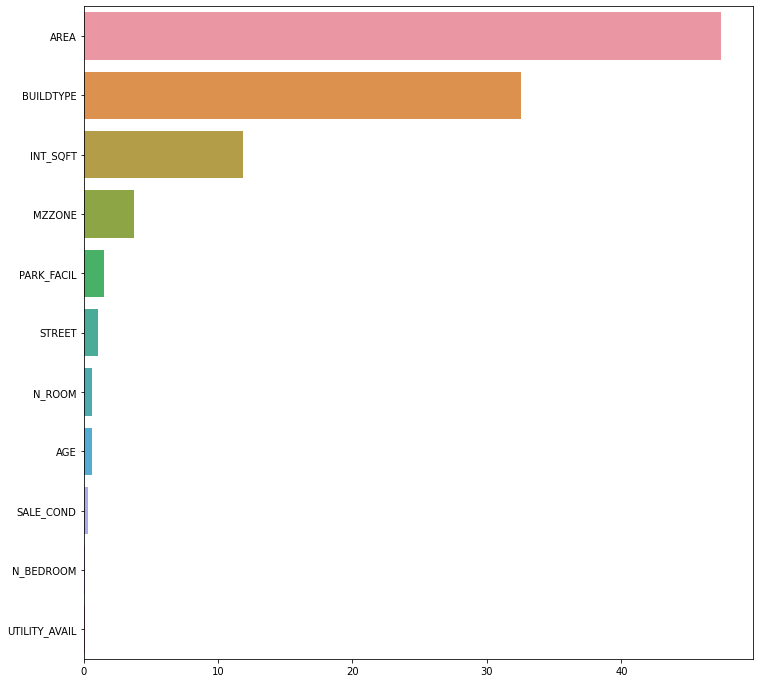

In [694]:
plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

In [695]:
main_features = feature_scores.loc[feature_scores > 0]
main_features

AREA             47.434686
BUILDTYPE        32.536932
INT_SQFT         11.861222
MZZONE            3.769805
PARK_FACIL        1.489468
STREET            1.098755
N_ROOM            0.639630
AGE               0.596575
SALE_COND         0.307331
N_BEDROOM         0.140308
UTILITY_AVAIL     0.125288
dtype: float64

In [696]:
main_features = ['AREA','INT_SQFT','N_BEDROOM','PARK_FACIL','MZZONE','BUILDTYPE','STREET']

In [697]:
X=df[main_features]

In [698]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [701]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score


In [703]:
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)


GradientBoostingRegressor()

In [704]:
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

98.54088129442067

In [705]:
GradientBoosting.predict([[1,1500,2,1,1,1,1]])

array([6375139.00245912])